# DECaLS predictions

Run the test set through the pretrained model

## Setup

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

Importing project modules works best from the project root directory.

In [2]:
os.chdir('..')

import zoobot
import projcode
from projcode.data.utils import read_params
from projcode.predictions.make_predictions import decals_catalog
from projcode.predictions.view_predictions import ViewPredictions
from zoobot.shared.label_metadata import decals_pairs

In [3]:
params = read_params()

## Check the catalog file

There are also shards in `tfrecord` format, but these are bizarrely difficult to work with. Better to keep it simple.

In [4]:
dataroot = Path(params['dataroot'])
catalog_file = dataroot / 'shards/decals/test_shards/test_df.csv'

In [5]:
df = pd.read_csv(catalog_file)
df.head(5)

,Unnamed: 0,id_str,file_loc,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,disk-edge-on_yes,disk-edge-on_no,has-spiral-arms_yes,has-spiral-arms_no,...,spiral-arm-count_1,spiral-arm-count_2,spiral-arm-count_3,spiral-arm-count_4,spiral-arm-count_more-than-4,spiral-arm-count_cant-tell,merging_none,merging_minor-disturbance,merging_major-disturbance,merging_merger
0,111075,J141907.77+042635.7,/home/colin/data/munch1tb/zoobot_data/gz_decal...,1.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,22533,J120551.27+242120.5,/home/colin/data/munch1tb/zoobot_data/gz_decal...,1.0,3.0,1.0,0.0,3.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0
2,124358,J001555.69+161458.0,/home/colin/data/munch1tb/zoobot_data/gz_decal...,4.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
3,47608,J103628.30+000818.0,/home/colin/data/munch1tb/zoobot_data/gz_decal...,4.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0
4,90582,J082651.90+140856.1,/home/colin/data/munch1tb/zoobot_data/gz_decal...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


## Run predictions

Ignore all the nonsense about NUMA node. Users have been complaining about this for years, but Tensorflow still does it.

In [6]:
save_loc = dataroot / 'results/predictions/decals.hdf5'

In [7]:
# %time decals_catalog(params, save_loc)

## View predictions

In [8]:
vp = ViewPredictions()
vp.read_predictions(save_loc)
vp.make_prediction_summaries()

In [9]:
vp.results.head(2)

,file_loc,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_artifact,disk-edge-on_yes,disk-edge-on_no,has-spiral-arms_yes,has-spiral-arms_no,bar_strong,bar_weak,...,spiral-arm-count_1,spiral-arm-count_2,spiral-arm-count_3,spiral-arm-count_4,spiral-arm-count_more-than-4,spiral-arm-count_cant-tell,merging_none,merging_minor-disturbance,merging_major-disturbance,merging_merger
0,/home/colin/data/munch1tb/zoobot_data/gz_decal...,24.585224,47.126320,2.547081,37.434212,2.384364,6.699317,4.103290,1.479639,5.054061,...,1.128513,9.593546,1.531305,2.105283,1.051178,48.488930,75.635941,6.258410,1.058971,1.219766
1,/home/colin/data/munch1tb/zoobot_data/gz_decal...,3.121219,43.051598,1.741715,1.676396,90.948959,35.482941,1.227375,1.143801,5.037024,...,1.000283,1.206696,1.258230,1.271014,1.000010,3.857238,40.318962,9.000361,2.562151,1.091530


In [10]:
vp.summaries.head(2)

,file_loc,smooth-or-featured,disk-edge-on,has-spiral-arms,bar,bulge-size,how-rounded,edge-on-bulge,spiral-winding,spiral-arm-count,merging
0,/home/colin/data/munch1tb/zoobot_data/gz_decal...,"[[smooth-or-featured, featured-or-disk], 0.634...","[[disk-edge-on, yes], 0.9401192665100098]","[[has-spiral-arms, yes], 0.6201574802398682]","[[bar, no], 0.6682100892066956]","[[bulge-size, small], 0.7810470461845398]","[[how-rounded, cigar-shaped], 0.9727775454521179]","[[edge-on-bulge, none], 0.6480322480201721]","[[spiral-winding, tight], 0.6849639415740967]","[[spiral-arm-count, cant-tell], 0.758839964866...","[[merging, none], 0.8985763788223267]"
1,/home/colin/data/munch1tb/zoobot_data/gz_decal...,"[[smooth-or-featured, featured-or-disk], 0.898...","[[disk-edge-on, no], 0.9819012880325317]","[[has-spiral-arms, yes], 0.9665659070014954]","[[bar, no], 0.7243795990943909]","[[bulge-size, small], 0.789142370223999]","[[how-rounded, in-between], 0.7172414660453796]","[[edge-on-bulge, rounded], 0.7362374663352966]","[[spiral-winding, tight], 0.7864148616790771]","[[spiral-arm-count, cant-tell], 0.402069002389...","[[merging, none], 0.7611227631568909]"


In [12]:
vp.make_observed_summaries(catalog_file)

vp.obs_summaries.head(1)

,file_loc,smooth-or-featured,disk-edge-on,has-spiral-arms,bar,bulge-size,how-rounded,edge-on-bulge,spiral-winding,spiral-arm-count,merging
0,/home/colin/data/munch1tb/zoobot_data/gz_decal...,"[[smooth-or-featured, featured-or-disk], 0.8]","[[disk-edge-on, yes], 1.0]","[[has-spiral-arms, yes], nan]","[[bar, strong], nan]","[[bulge-size, dominant], nan]","[[how-rounded, cigar-shaped], 1.0]","[[edge-on-bulge, none], 0.5]","[[spiral-winding, tight], nan]","[[spiral-arm-count, 1], nan]","[[merging, none], 1.0]"


,question,pred,pred_confidence,obs,obs_confidence
0,smooth-or-featured,featured-or-disk,0.89,featured-or-disk,1.0
1,disk-edge-on,no,0.93,no,1.0
2,has-spiral-arms,yes,0.95,yes,1.0
3,bar,weak,0.44,no,0.6
4,bulge-size,moderate,0.62,small,0.8
5,how-rounded,in-between,0.57,round,NaN
6,edge-on-bulge,rounded,0.82,boxy,NaN
7,spiral-winding,medium,0.57,medium,0.6
8,spiral-arm-count,2,0.91,2,1.0
9,merging,none,0.83,none,0.8


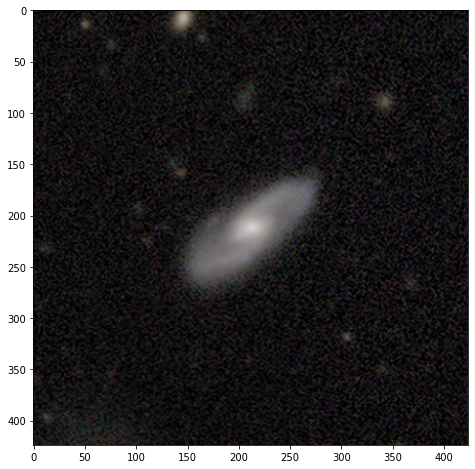

In [13]:
inx = 2000
file_loc, comp = vp.one_comparison(inx)
display(comp)
img = mpimg.imread(file_loc)
fig = plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)

In [ ]:
# example = vp.summaries.iloc[20]

# questions = vp.summaries.columns.values[1:]
# preds = [f"{q}: {example[q][0][1]}, ({example[q][1]:.2f})" for q in questions]
# obs = vp.obs_summaries.loc[df['file_loc'] == example['file_loc']].iloc[0]

In [ ]:
# comp = pd.DataFrame(columns=['question', 'pred', 'pred_confidence', 'obs', 'obs_confidence'])
# comp['question'] = questions
# comp['pred'] = [example[q][0][1] for q in questions]
# comp['pred_confidence'] = [f"{example[q][1]:.2f}" for q in questions]
# comp['obs'] = [obs[q][0][1] for q in questions]
# comp['obs_confidence'] = [obs[q][1] for q in questions]
# comp